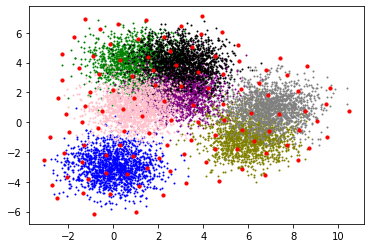

In [4]:
#k center problem with outliers
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.datasets import make_blobs

class KCenterProblemWithOutliers():
  def __init__(self, x_input, y_input) -> None:
    self.x_input, self.y_input = x_input, y_input
    self.NUM_INPUTS = len(x_input)
    self.dists = [[0 for _ in range(self.NUM_INPUTS)] for _ in range(self.NUM_INPUTS)]
    self.selected_samples = []
    self.center_dists = [float('inf') for _ in range(self.NUM_INPUTS)]

    self.compute_dists()

  def compute_dists(self):
    for r in range(self.NUM_INPUTS):
      for c in range(self.NUM_INPUTS):
        if not r == c:
          self.dists[r][c] = math.sqrt((self.x_input[r] - self.x_input[c])**2 + (self.y_input[r] - self.y_input[c])**2)

  def select_samples(self, query_size):
    # ******************************** Helper ********************************
    def maxindex(dist):
      max_ind = 0
      for i in range(self.NUM_INPUTS):
          if (dist[i] > dist[max_ind]):
              max_ind = i
      return max_ind

    # ******************************* Algortihm ******************************
    max_center = 0

    for _ in range(query_size):
      self.selected_samples.append(max_center)
      
      for j in range(self.NUM_INPUTS):
        self.center_dists[j] = min(self.center_dists[j], self.dists[max_center][j])
      
      max_center = maxindex(self.center_dists)
    # ************************************************************************

    x_query, y_query = [], []
    for sample_ind in self.selected_samples:
      x_query.append(self.x_input[sample_ind])
      y_query.append(self.y_input[sample_ind])

    self.plot_points(x_input, y_input, x_query, y_query)

    return self.selected_samples

  def plot_points(self, x_input, y_input, x_query, y_query):
    # plt.scatter(x=x_input, y=y_input, s=1, color='blue')
    plt.scatter(x=x_query, y=y_query, s=10, color='red')
    plt.show()

if __name__ == '__main__' :
  num_inputs = 11_000
  query_size = 110

  centers = [(0, -3), (1, 4), (3,2), (3,4), (1,1), (6,-1), (7,1)]
  cluster_std = [1,1,1,1,1,1,1]

  x, y = make_blobs(n_samples=num_inputs, cluster_std=cluster_std, centers=centers, n_features=2, random_state=1)

  x_input = x[:,0].tolist()
  y_input = x[:,1].tolist()

  clusters = [[] for _ in range(len(centers))]

  for ind, label in enumerate(y):
    clusters[label].append(x[ind])

  colors = ['blue', 'green', 'purple', 'black', 'pink', 'olive', 'gray']
  
  x_coordinates = [[] for _ in range(len(centers))]
  y_coordinates = [[] for _ in range(len(centers))]

  for ind, cluster in enumerate(clusters):
    for x, y in cluster:
        x_coordinates[ind].append(x)
        y_coordinates[ind].append(y)

    plt.scatter(x_coordinates[ind], y_coordinates[ind], color=colors[ind], s=1)
  
  for _ in range(1):
    if num_inputs // query_size > 0:
      query = KCenterProblemWithOutliers(x_input, y_input)

      prev_query_inds = query.select_samples(query_size)
      prev_query_inds.sort(reverse=True)

      for ind in prev_query_inds:
        x_input.pop(ind)
        y_input.pop(ind)

In [ ]:
# (Slow) K Center Problem for tensors

import torch

# ******************************** Helper ********************************
def max_ind(dist):
  max_ind = 0
  for i in range(num_inputs):
      if (dist[i] > dist[max_ind]):
          max_ind = i
  return max_ind

# ******************************* Algortihm ******************************
num_inputs = 11_000
dim = 1000
query_size = 8
inputs = []

for _ in range(num_inputs):
  inputs.append(torch.rand(1,dim))
  
dists_between_inputs = torch.zeros(num_inputs, num_inputs)

for r in range(num_inputs):
  for c in range(num_inputs):
    dists_between_inputs[r][c] = torch.cdist(inputs[r], inputs[c])

dists_from_centers = torch.Tensor([float('inf') for _ in range(num_inputs)])

max_center_ind = 0
selected_samples_inds = []

for _ in range(query_size):
  selected_samples_inds.append(max_center_ind)

  for i in range(num_inputs):
    dists_from_centers[i] = min(dists_from_centers[i], dists_between_inputs[max_center_ind][i])

  max_center_ind = max_ind(dists_from_centers)

print(selected_samples_inds)

In [56]:
# Fast K-center problem for high-dimensional tensors (fixed)
# Meant to be applied over the unlabeled dataset only

import torch
import numpy as np

# ******************************** Helper ********************************
def max_ind(dist):
  max_ind = 0
  for i in range(num_inputs):
      if (dist[i] > dist[max_ind]):
          max_ind = i
  return max_ind

# ******************************* Algortihm ******************************
num_inputs = 10_000
dim = (3,28,28)
query_size = 100
input_tensors = []

for _ in range(num_inputs):
  input_tensors.append(torch.rand(dim).numpy())

input_tensors = torch.Tensor(input_tensors).view(num_inputs, dim[0]*dim[1]*dim[2])

dists_between_inputs = torch.cdist(input_tensors, input_tensors, p=2)

dists_from_centers = torch.Tensor([float('inf') for _ in range(num_inputs)])

max_center_ind = 0
selected_samples_inds = []

for _ in range(query_size):
  selected_samples_inds.append(max_center_ind)

  for i in range(num_inputs):
    dists_from_centers[i] = min(dists_from_centers[i], dists_between_inputs[max_center_ind][i])

  max_center_ind = max_ind(dists_from_centers)

print(selected_samples_inds)

[0, 8825, 2668, 8900, 8395, 1019, 8733, 8494, 3663, 5457, 9754, 7729, 4300, 5269, 8078, 8942, 8663, 9324, 2469, 7602, 4061, 1747, 6612, 2711, 7672, 9421, 6309, 3770, 5365, 6065, 3762, 4910, 6985, 7039, 4851, 9035, 3060, 3690, 9526, 2638, 569, 2102, 6241, 3016, 2135, 7171, 3425, 1360, 6383, 9572, 9570, 473, 5422, 6251, 3349, 1593, 9738, 7449, 3610, 6410, 230, 9327, 3216, 7841, 3177, 8888, 8486, 158, 6597, 854, 5783, 1711, 2169, 5666, 4979, 2647, 1149, 1807, 7589, 9438, 9524, 9116, 866, 9940, 2757, 8426, 5116, 403, 3706, 2477, 6096, 4176, 791, 4887, 6280, 7820, 1236, 5098, 7357, 7954]


In [ ]:
def select_core_set(unlabeled_data, labeled_data, core_set_size):
    # Calculate pairwise distances between labeled and unlabeled data
    distances = calculate_distances(labeled_data, unlabeled_data)
    # Initialize a list to store indices of selected data points
    core_set_indices = []
    # Add data point with maximum distance to labeled data set
    max_distances, _ = torch.max(distances, dim=0)
    _, idx = torch.max(max_distances, dim=0)
    core_set_indices.append(idx.item())
    # Add additional data points to core set
    for i in range(core_set_size - 1):
        # Calculate pairwise distances between core set and unlabeled data
        core_set_data = unlabeled_data[core_set_indices]
        distances = calculate_distances(core_set_data, unlabeled_data)
        # Calculate minimum distance between each unlabeled data point and the core set
        min_distances, _ = torch.min(distances, dim=0)
        # Add data point with maximum minimum distance to core set
        _, idx = torch.max(min_distances, dim=0)
        core_set_indices.append(idx.item())
    # Return the selected core set
    core_set = unlabeled_data[core_set_indices]
    return core_set

labeled_data = ... # Define the labeled data
core_set_size = 100  # Define the desired size of the core set
core_set = select_core_set(unlabeled_data, labeled_data, core_set_size)
